# IMPORTING LIBS

In [2]:
# 📦 Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Scikit-learn Modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 📊 Display Settings
# Set float formatting for better readability
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns in DataFrame output
pd.set_option('display.max_columns', 999)


# IMPORTING DATASET

In [3]:
df = pd.read_csv("../data/Smart watch prices.csv")
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [4]:
print(df.shape)

(379, 13)


In [5]:
df.describe()

,Display Size (inches)
count,376.00
mean,1.36
std,0.22
min,0.90
25%,1.20
50%,1.39
75%,1.40
max,4.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [7]:
df.describe(include='object')

,Brand,Model,Operating System,Connectivity,Display Type,Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
count,378,378,376,378,377,375,378,378,378,378,378,378
unique,42,137,35,5,27,36,7,30,1,2,2,50
top,Garmin,Sense,Wear OS,"Bluetooth, Wi-Fi",AMOLED,454 x 454,50,14,Yes,Yes,Yes,$299
freq,34,15,131,293,207,90,275,83,378,348,317,57


In [8]:
df.isna().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Brand                        0
Model                        0
Operating System             0
Connectivity                 0
Display Type                 0
Display Size (inches)        0
Resolution                   0
Water Resistance (meters)    0
Battery Life (days)          0
Heart Rate Monitor           0
GPS                          0
NFC                          0
Price (USD)                  0
dtype: int64

In [10]:
df.nunique()

Brand                         42
Model                        135
Operating System              34
Connectivity                   5
Display Type                  26
Display Size (inches)         31
Resolution                    36
Water Resistance (meters)      7
Battery Life (days)           30
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   49
dtype: int64

In [11]:
# Numerical columns (int and float)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Categorical columns (object and category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
print(num_cols)
print("-"*50)
print(cat_cols)

['Display Size (inches)']
--------------------------------------------------
['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type', 'Resolution', 'Water Resistance (meters)', 'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC', 'Price (USD)']


# Visualisation

In [26]:
cols_size = len(cat_cols)

### Barchart

In [25]:
def plot_hist_top_n_nunique_features(df, top_n=5, bins=20):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Get the top N numeric columns with the most unique values
    top_features = numeric_df.nunique().sort_values(ascending=False).head(top_n).index

    # Plot histograms
    for col in top_features:
        plt.figure(figsize=(8, 4))
        plt.hist(df[col].dropna(), bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of "{col}"')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

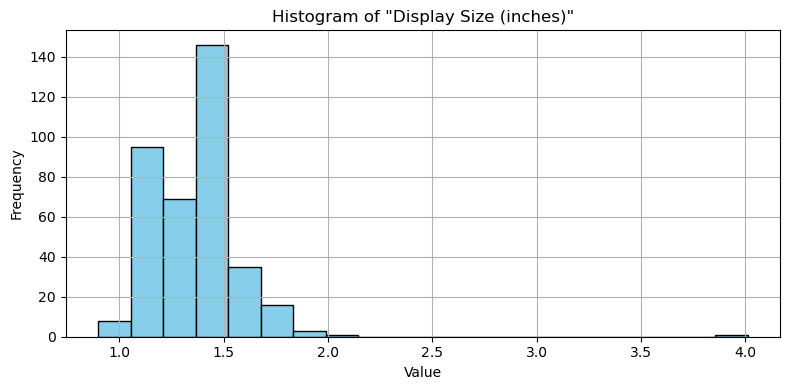

In [27]:
plot_hist_top_n_nunique_features(df, top_n=cols_size, bins=20)

In [21]:
def plot_top_n_values_in_top_n_nunique_features(df, top_n_features=5, top_n_values=10):
    # Get top N columns with highest number of unique values
    nunique_counts = df.nunique().sort_values(ascending=False)
    top_features = nunique_counts.head(top_n_features).index

    # Plot only the top N most frequent values for each feature
    for col in top_features:
        top_vals = df[col].value_counts().nlargest(top_n_values).index
        filtered_df = df[df[col].isin(top_vals)]

        plt.figure(figsize=(8, 4))
        sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)
        plt.title(f'Top {top_n_values} Most Frequent Values in "{col}"')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


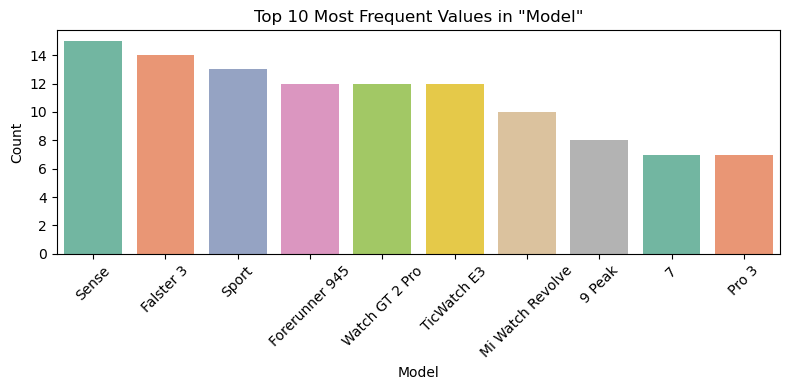

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


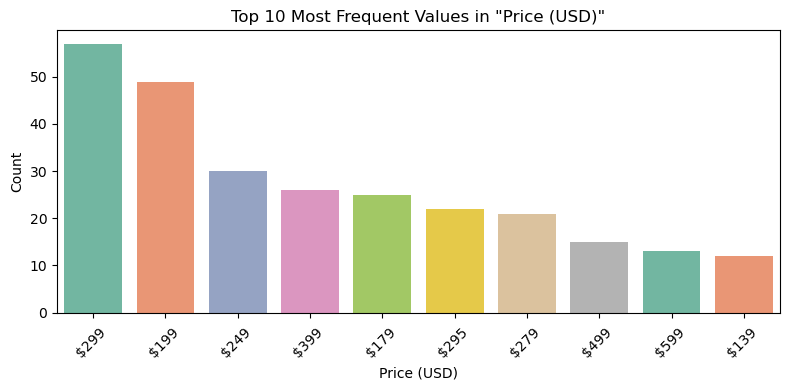

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


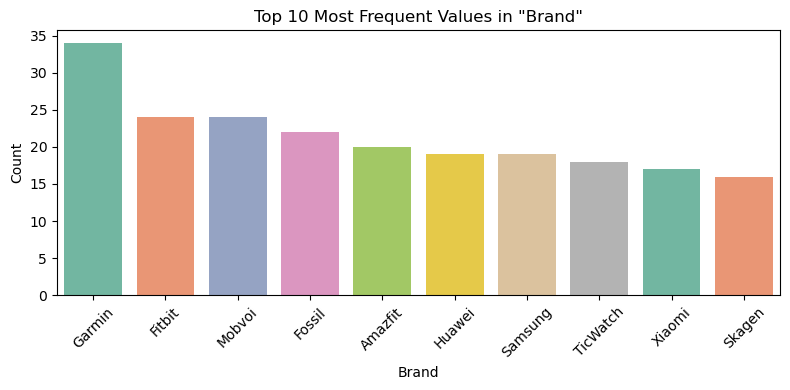

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


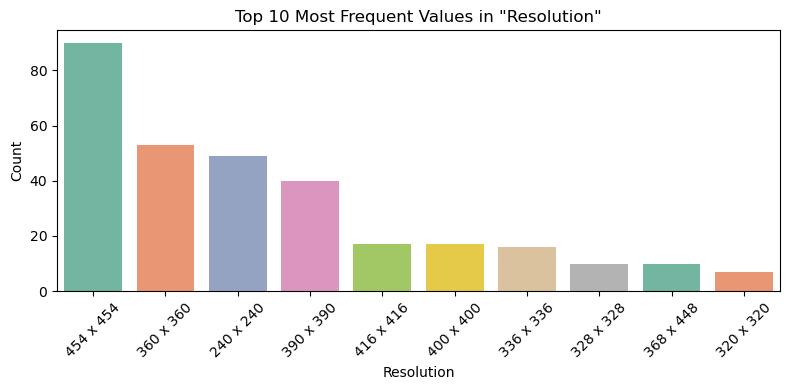

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


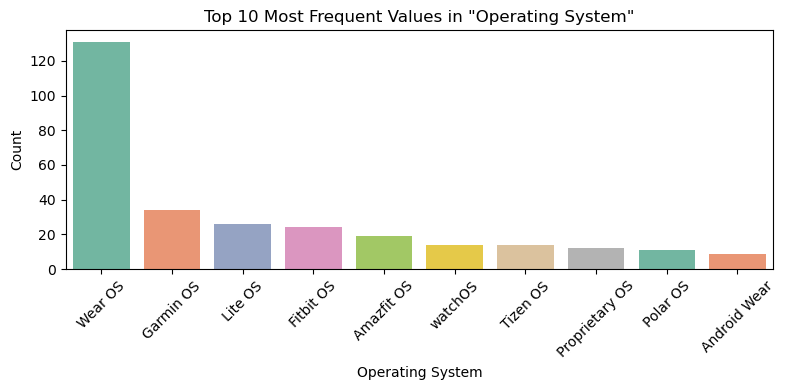

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


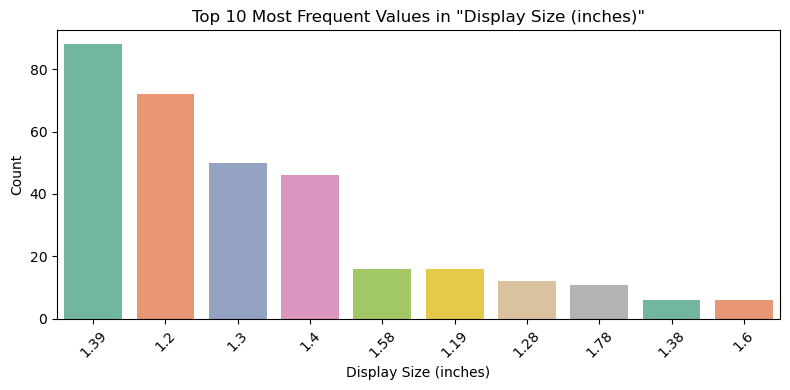

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


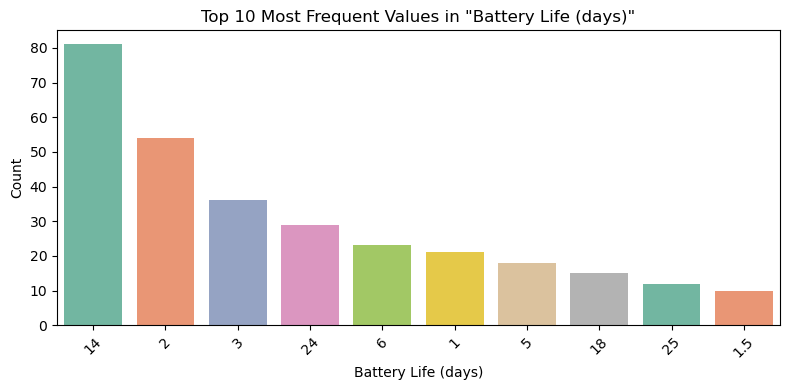

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


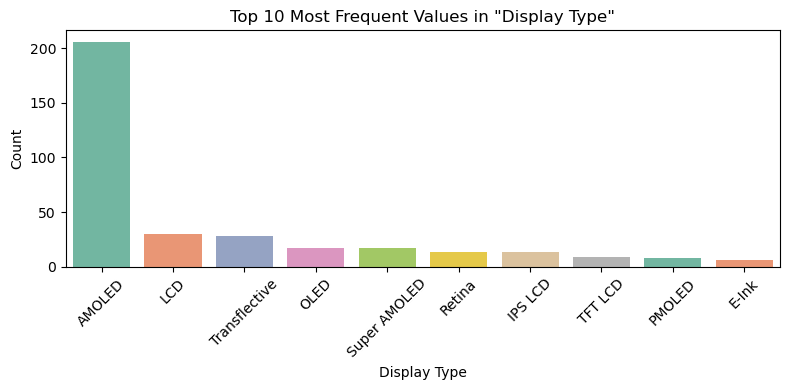

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


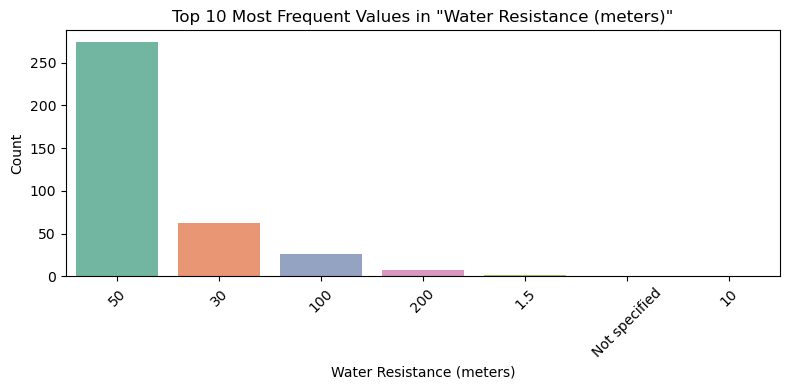

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


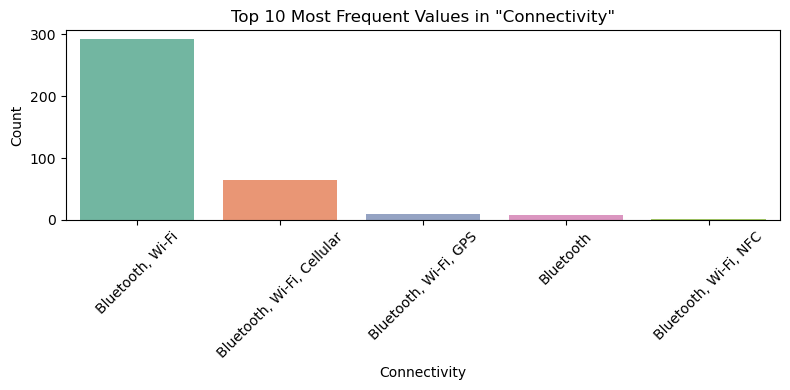

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


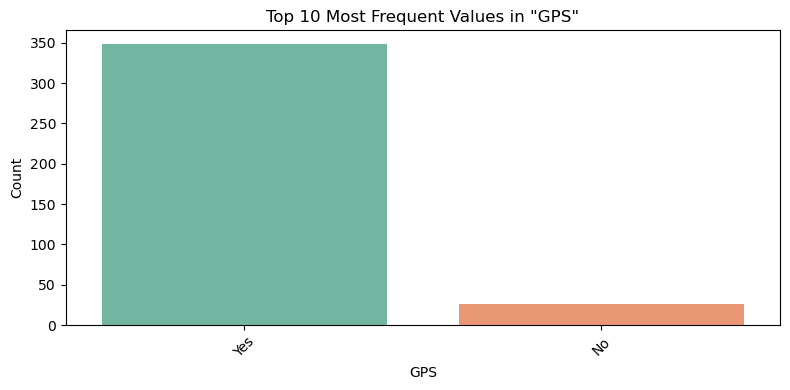

C:\Users\HP\AppData\Local\Temp\ipykernel_16068\3172123659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, palette='Set2', order=top_vals)


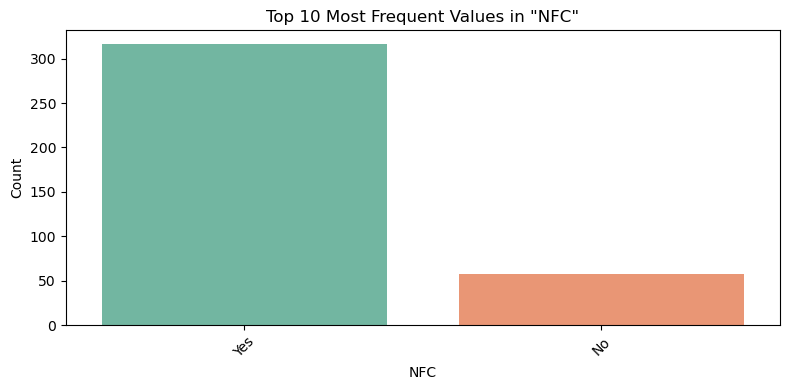

In [28]:
plot_top_n_values_in_top_n_nunique_features(df, top_n_features=cols_size, top_n_values=10);